Esercitazione Valsecchi-Molteni

mat. Valsecchi: 730030

mat. Molteni: 730113

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
import seaborn as sns
%matplotlib inline
print('setup complete')

setup complete


In [279]:
naz=pd.read_csv("nazionale.csv", index_col=0)#dataset contenente dati a livello nazionale
naz=naz.drop('stato', axis=1)#drop colonna stato contenente sempre il valore 'ITA'
######################################
reg=pd.read_csv("regione.csv")#dataset contenente dati a livello regionale 22
reg=reg.drop(['lat','long'], axis=1)#drop colonna stato contenente valori inutili
######################################
prov=pd.read_csv("provincia.csv")
#prov=prov.dropna()#drop righe contenenti valori nan fare scriptino per gestire napoli
prov=prov.drop(['stato','lat','long'], axis=1)#drop colonna stato contenente valori non utili
prov=prov.fillna('X') #definisco come sigle di provincia X le denominazioni in fase di definizione/aggiornamento E la sigla di napoli
prov.loc[prov['codice_provincia']==63, 'sigla_provincia']='NA'#sostituisco la X per la provincia di napoli con NA in quanto è stato considerato valore nan in fase di caricamento
######################################
glob= pd.read_csv("globale2.csv")
glob.columns=[str.replace("/","_") for str in glob.columns]#sostituisco nelle colonne / con _
######################################
chita= pd.read_csv("ChIta.csv", sep=';') #importo dataset con dati demografici ed economici Italia e Cina
chita=chita.rename(columns={"PIL(MLD)":"PIL"})
#ds_chita.sort_values(by=['Contagi'], ascending = False, inplace = True) #ordino in maniera decrescente
#il PIL è in dollari americani

In [280]:
######################################
################METODI################
######################################
def combina(l1,l2):
    l3=[]
    l4=[]
    for x in range(len(l1)):
        l3.append(l1[x])
        l3.append(l2[x])
        l4.append(l3)
        l3=[]
    return l4
######################################
def classifica_contagi(l):
    for x in range(len(l)):
        print((x+1),') ',l[-x-1][0],': ',l[-x-1][1])
######################################
def crono_contagi(df,l):#df regione, lista primi_tre #metodo per ottenere i contagi di una determianta serie di regioni
    dff=df.copy()#df su cui lavorare qua
    crono_tot=[]#lista di liste contenente le 3 cronologie
    crono_parz=[]#lsita di appoggio in cui inserire i dati di una locazione
    for x in range(len(l)):
        regione=l[x]#regione su cui lavorare
        indexNames = dff[ dff['denominazione_regione'] != regione ].index
        dff.drop(indexNames , inplace=True)#droppo tutti i dati delle regioni che non mi servono
        for y in dff.totale_casi:#estraggo i dati dei casi totali
            crono_parz.append(y)
        crono_tot.append(crono_parz)
        crono_parz=[]
        dff=df.copy()#resetto il dataframe d'appoggio
    return crono_tot
######################################
def crono_deceduti(df,l):#df regione, lista primi_tre #metodo per ottenere i contagi di una determianta serie di regioni
    dff=df.copy()#df su cui lavorare qua
    crono_tot=[]#lista di liste contenente le 3 cronologie
    crono_parz=[]#lsita di appoggio in cui inserire i dati di una locazione
    for x in range(len(l)):
        regione=l[x]#regione su cui lavorare
        indexNames = dff[ dff['denominazione_regione'] != regione ].index
        dff.drop(indexNames , inplace=True)#droppo tutti i dati delle regioni che non mi servono
        for y in dff.deceduti:#estraggo i dati dei casi totali
            crono_parz.append(y)
        crono_tot.append(crono_parz)
        crono_parz=[]
        dff=df.copy()#resetto il dataframe d'appoggio
            
    return crono_tot
######################################
def crono_dimessi(df,l):#df regione, lista primi_tre #metodo per ottenere i contagi di una determianta serie di regioni
    dff=df.copy()#df su cui lavorare qua
    crono_tot=[]#lista di liste contenente le 3 cronologie
    crono_parz=[]#lsita di appoggio in cui inserire i dati di una locazione
    for x in range(len(l)):
        regione=l[x]#regione su cui lavorare
        indexNames = dff[ dff['denominazione_regione'] != regione ].index
        dff.drop(indexNames , inplace=True)#droppo tutti i dati delle regioni che non mi servono
        for y in dff.dimessi_guariti:#estraggo i dati dei casi totali
            crono_parz.append(y)
        crono_tot.append(crono_parz)
        crono_parz=[]
        dff=df.copy()#resetto il dataframe d'appoggio
            
    return crono_tot
######################################
def crono_tamponi(df,l):#df regione, lista primi_tre
    dff=df.copy()#df su cui lavorare qua
    crono_tot=[]#lista di liste contenente le 3 cronologie
    crono_parz=[]#lsita di appoggio in cui inserire i dati di una locazione
    for x in range(len(l)):
        regione=l[x]#regione su cui lavorare
        indexNames = dff[ dff['denominazione_regione'] != regione ].index
        dff.drop(indexNames , inplace=True)#droppo tutti i dati delle regioni che non mi servono
        for y in dff.tamponi:#estraggo i dati dei casi totali
            crono_parz.append(y)
        crono_tot.append(crono_parz)
        crono_parz=[]
        dff=df.copy()#resetto il dataframe d'appoggio
            
    return crono_tot
######################################
def crono_contagi_prov(df,l):#df regione, lista primi_tre
    dff=df.copy()#df su cui lavorare qua
    crono_tot=[]#lista di liste contenente le 3 cronologie
    crono_parz=[]#lsita di appoggio in cui inserire i dati di una locazione
    for x in range(len(l)):
        prov=l[x]#provincia su cui lavorare
        indexNames = dff[ dff['denominazione_provincia'] != prov ].index
        dff.drop(indexNames , inplace=True)#droppo tutti i dati delle regioni che non mi servono
        for y in dff.totale_casi:#estraggo i dati dei casi totali
            crono_parz.append(y)
        crono_tot.append(crono_parz)
        crono_parz=[]
        dff=df.copy()#resetto il dataframe d'appoggio
            
    return crono_tot
######################################
def media_contagi_giorno(c):#lista nomi, crono contagi
    cp=0 #contagi giorno precedente
    ct=0 #contagi totali del giorno
    m=[] #lista appoggio su cui effettuare la media
    k=0 #accumulatore
    mm=[]#lista da ritornare con dentro le medie fatte
    for x in range(len(c)):#scorro la lista dei contagi
        for y in range(len(c[x])):#scorro la lista interna dei contagi
            ct=c[x][y]
            if y==0: #se non ho ancora registrato contagi in giorno precedente
                m.append(ct)#memorizzo subito i contagi totali
                cp=ct
            else:#ho già registrato i contagi del giorno precedente
                m.append(ct-cp) #memorizzo i contagi effettivi del giorno
                cp=ct
        #effettuo media
        for x in range(len(m)):
            k=k+m[x]
        mm.append(round(k/len(m),2))#media nuovi contagi giornalieri
        k=0
    return mm
######################################
def media_decessi_giorno(c):#lista decessi
    dp=0#decessi giorno precedente
    dt=0#decessi totali
    k=0#accumulatore
    m=[]#lista per i valori delle differenze
    for x in range(len(c)):#scorro lista decessi
        dp=c[x]
        if x==0:
            dt=dp
            m.append(dt)
        if x!=0:
            dp=dt
            dt=c[x]
            m.append(dt-dp)#salvo differenza tra decessi totali e quelli del giorno prima
            dp=dt
    for x in range(len(m)):
        k=k+m[x]
    return round(k/len(m),2)
######################################
def combina_4(l1,l2,l5,l6):
    l3=[]
    l4=[]
    for x in range(len(l1)):
        l3.append(l1[x])
        l3.append(l2[x])
        l3.append(l5[x])
        l3.append(l6[x])
        l4.append(l3)
        l3=[]
    return l4
######################################
def combina_3(l1,l2,l5):
    l3=[]
    l4=[]
    for x in range(len(l1)):
        l3.append(l1[x])
        l3.append(l2[x])
        l3.append(l5[x])
        l4.append(l3)
        l3=[]
    return l4

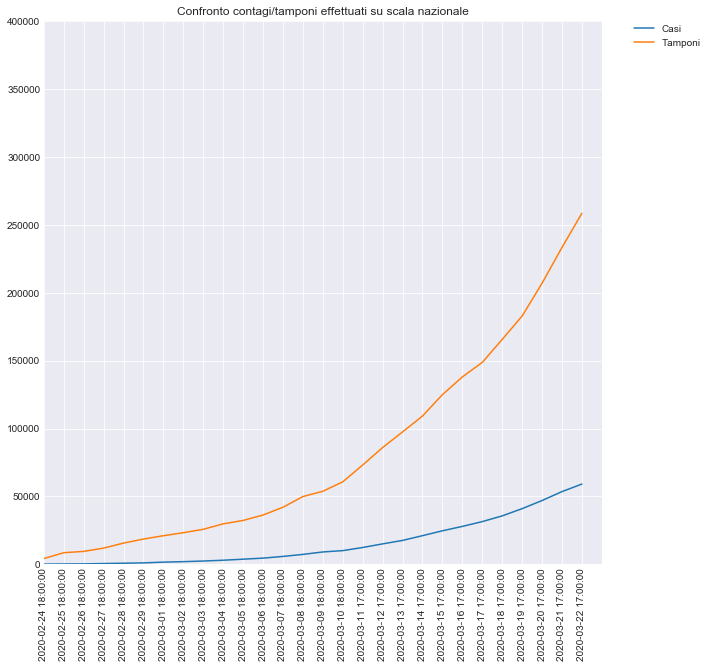

In [281]:
plt.style.use('seaborn-darkgrid')
plt.subplots(figsize=(10,10))
plt.plot(naz['totale_casi'], label='Casi')
plt.plot(naz['tamponi'], label='Tamponi')

limy=400000 #imposto limite asse y

plt.xlim(0,len(naz)) #imposto grandezze asse x
plt.ylim(0,limy) #imposto grandezze asse y
plt.xticks(rotation='vertical') #ruoto i label asse x
plt.margins(2)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Confronto contagi/tamponi effettuati su scala nazionale')
plt.show()

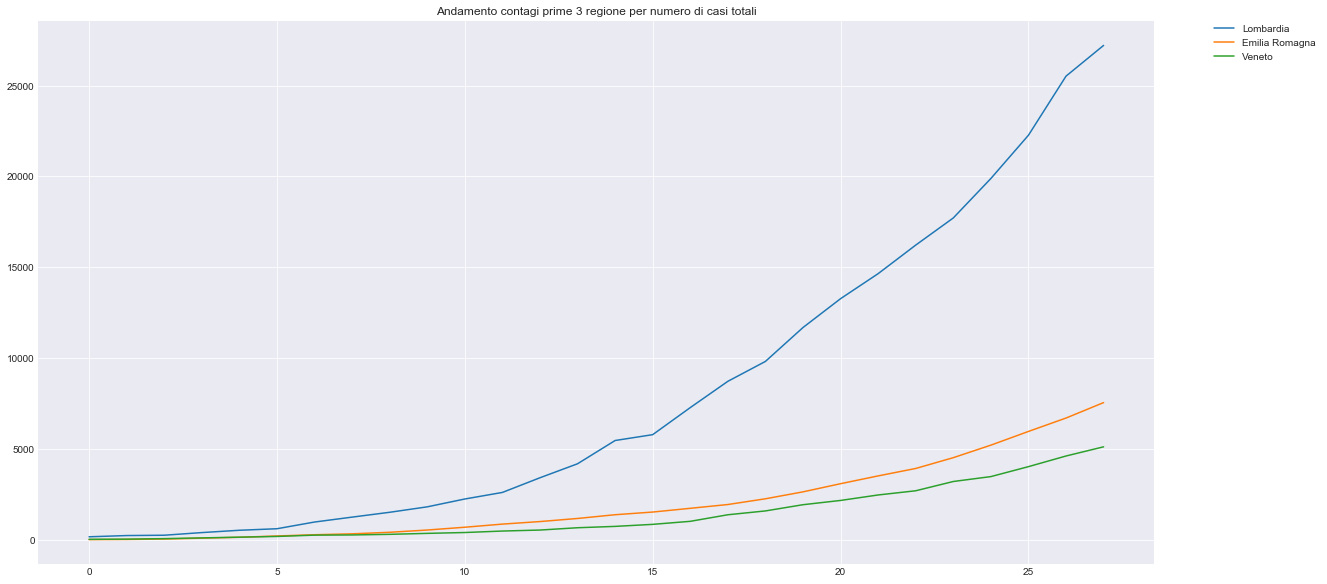

Confronto contagi/tamponi effettuati per le prime 3 regioni più colpite


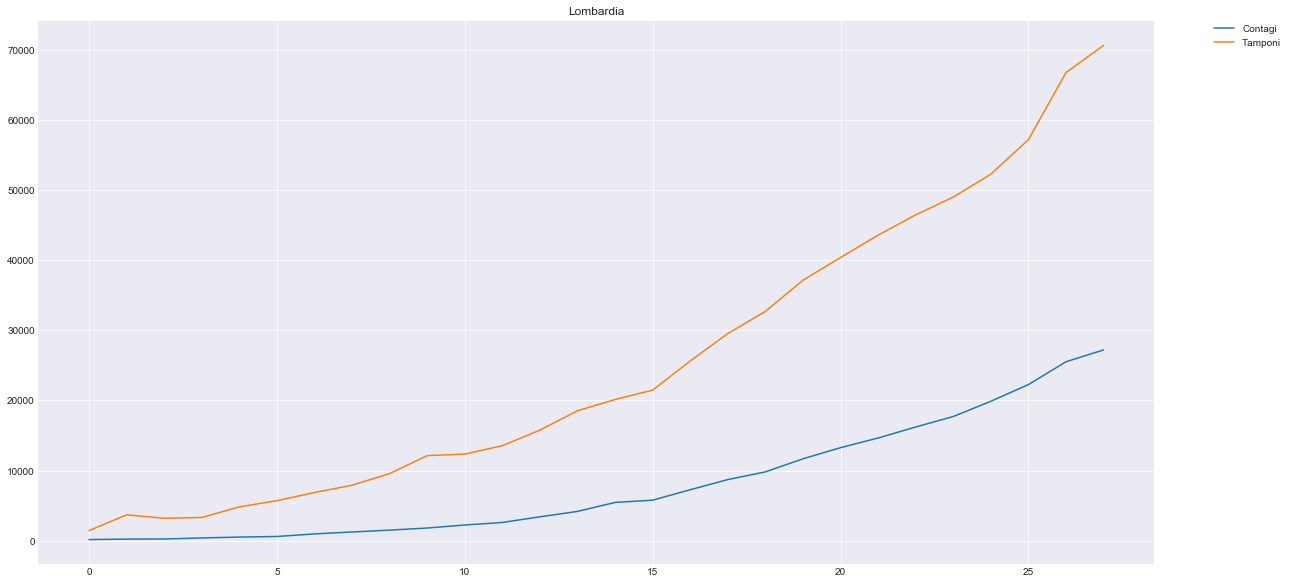

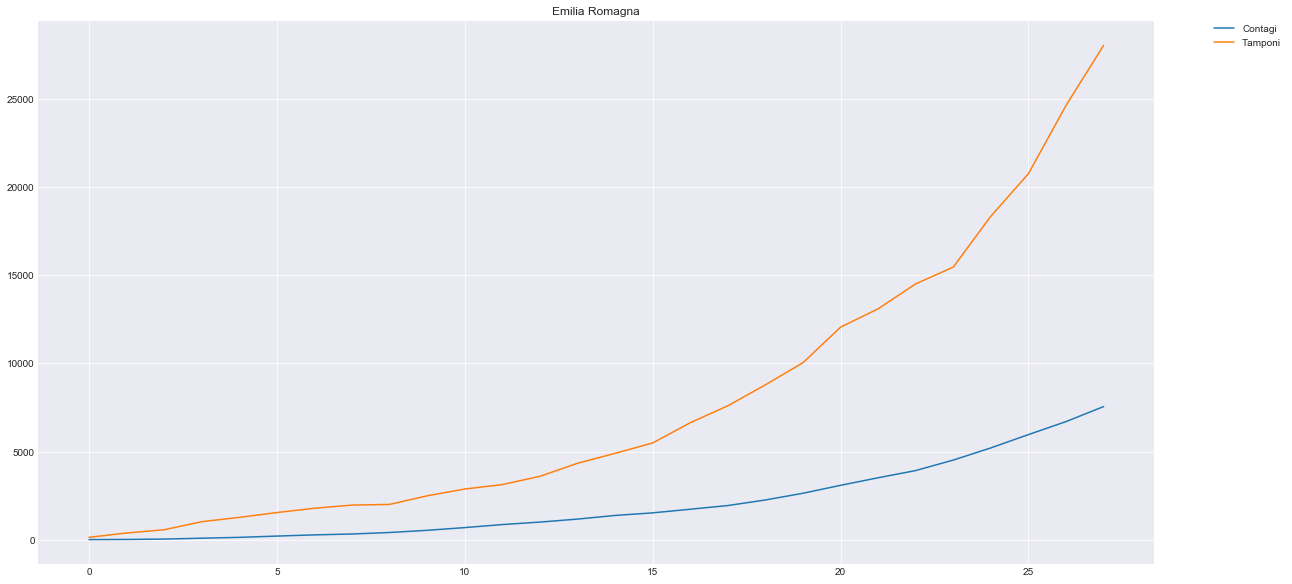

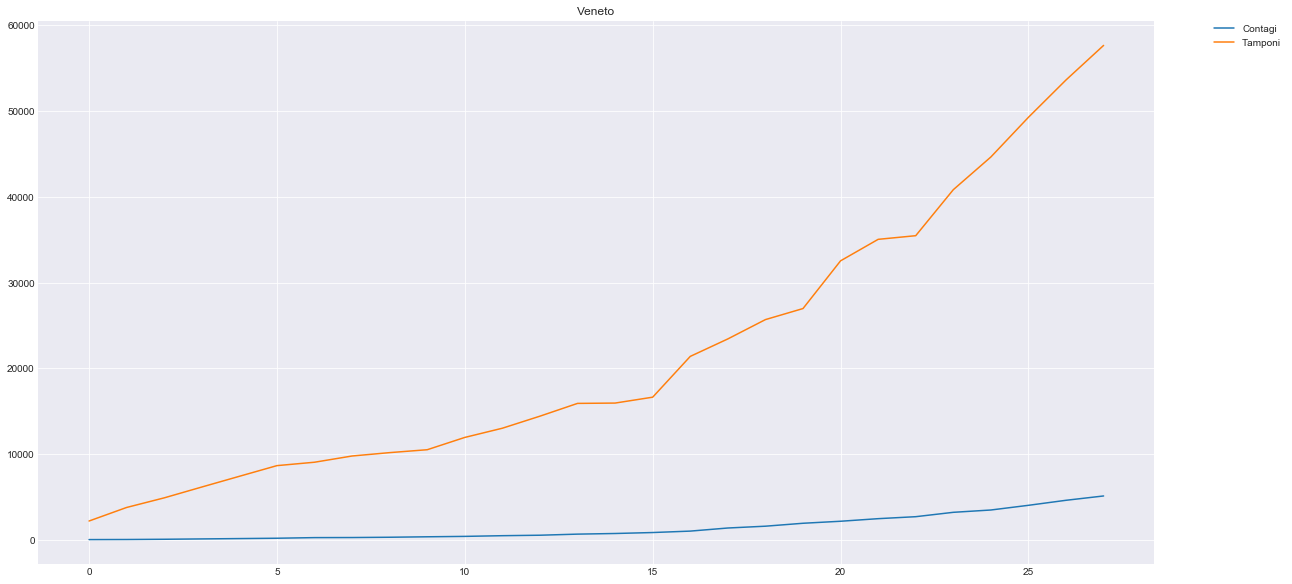

In [282]:
last_date=reg.loc[587]['data']#ottengo data dell'ultima registrazione

regg=reg.copy()

indexNames = regg[ regg['data'] != last_date ].index
regg.drop(indexNames , inplace=True)#droppo tutte le righe che non hanno la data pari all'ultimo record

regioni=[x for x in regg.denominazione_regione]#genero liste contenenti i dati dell'ultima data
casi=[x for x in regg.totale_casi]

combinato=combina(regioni, casi)#ottengo lista contenente la coppia regione-contagiati
combinato=sorted(combinato, key = itemgetter(1))#ordino la lista

regg=reg.copy()

primi_tre=[combinato[-1][0], combinato[-2][0], combinato[-3][0]]#memorizzo le prime 3 regioni colpite

cronologia_primi_tre_contagi=crono_contagi(regg, primi_tre)#array ocntenente la cronologia di crescita dei contagiati nelle 3 regioni


cronologia_primi_tre_tamponi=crono_tamponi(regg, primi_tre)#array contenente la cronologia di crescita dei tamponi nelle prime 3 regioni colpite

plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_contagi[0], label=primi_tre[0])
plt.plot(cronologia_primi_tre_contagi[1], label=primi_tre[1])
plt.plot(cronologia_primi_tre_contagi[2], label=primi_tre[2])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Andamento contagi prime 3 regione per numero di casi totali')
plt.show()

print('Confronto contagi/tamponi effettuati per le prime 3 regioni più colpite')
plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_contagi[0], label='Contagi')
plt.plot(cronologia_primi_tre_tamponi[0], label='Tamponi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title(primi_tre[0])
plt.show()

plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_contagi[1], label='Contagi')
plt.plot(cronologia_primi_tre_tamponi[1], label='Tamponi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title(primi_tre[1])
plt.show()

plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_contagi[2], label='Contagi')
plt.plot(cronologia_primi_tre_tamponi[2], label='Tamponi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title(primi_tre[2])
plt.show()

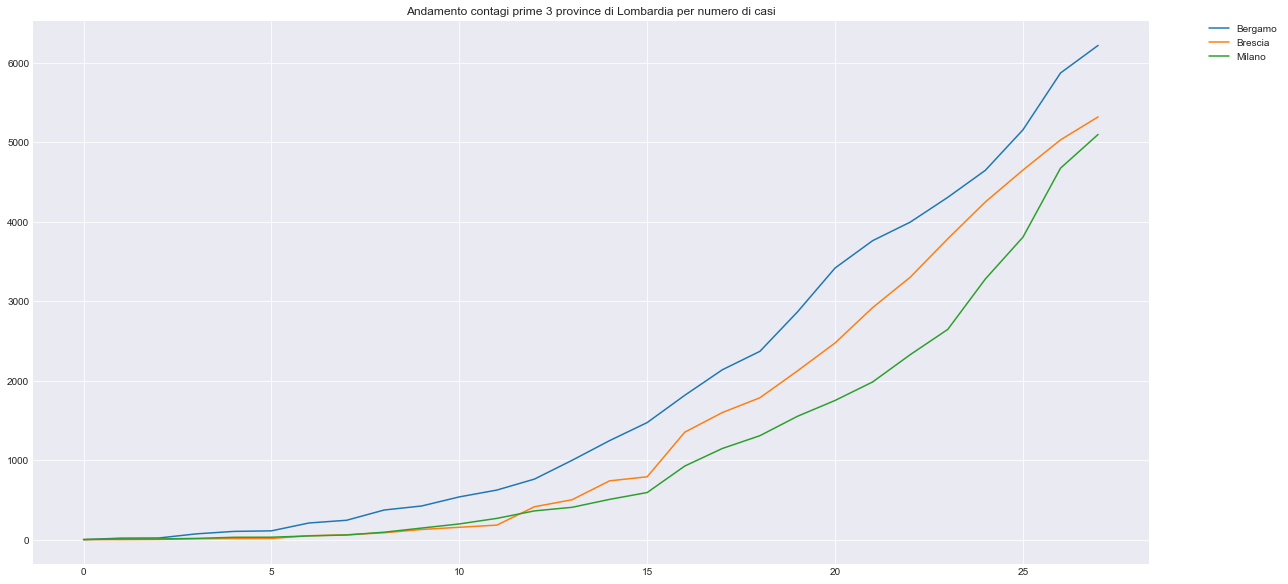

In [283]:
last_date=prov.loc[prov.shape[0]-1]['data']#ottengo data dell'ultima registrazione
prima_regione=primi_tre[0]#ottengo nome della prima regione per casi

provv=prov.copy()

indexNames = provv[ provv['data'] != last_date ].index
provv.drop(indexNames , inplace=True)#droppo tutte le righe che non hanno la data pari all'ultimo record

indexNames = provv[ provv['denominazione_regione'] != prima_regione ].index
provv.drop(indexNames , inplace=True)#droppo tutte le righe che non hanno la regione pari alla prima provincia

province=[x for x in provv.denominazione_provincia]#genero liste contenenti i dati dell'ultima data
casi=[x for x in provv.totale_casi]

comb=combina(province, casi)#ottengo lista contenente la coppia provincia-contagiati
comb=sorted(comb, key = itemgetter(1))#ordino la lista

provv=prov.copy()

primi_tre_prov=[comb[-1][0], comb[-2][0], comb[-3][0]]#memorizzo le prime 3 province colpite

cronologia_prime_tre_prov_contagi=crono_contagi_prov(provv, primi_tre_prov)

plt.subplots(figsize=(20,10))
plt.plot(cronologia_prime_tre_prov_contagi[0], label=primi_tre_prov[0])
plt.plot(cronologia_prime_tre_prov_contagi[1], label=primi_tre_prov[1])
plt.plot(cronologia_prime_tre_prov_contagi[2], label=primi_tre_prov[2])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
titolo="Andamento contagi prime 3 province di "+prima_regione+" per numero di casi"
plt.title(titolo)
#plt.legend()#primi_tre_prov[0],primi_tre_prov[1],primi_tre_prov[2])
#print("Andamento contagi prime 3 province di ",prima_regione," per numero di casi:")
plt.show()

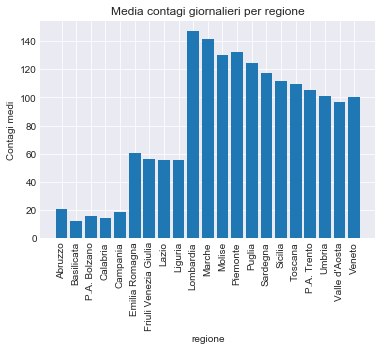

Classifica contagi medi giornalieri per regione:
1 )  Lombardia :  147.28
2 )  Marche :  141.75
3 )  Piemonte :  132.27
4 )  Molise :  130.13
5 )  Puglia :  124.82
6 )  Sardegna :  117.31
7 )  Sicilia :  111.38
8 )  Toscana :  109.62
9 )  P.A. Trento :  105.42
10 )  Umbria :  100.85
11 )  Veneto :  100.57
12 )  Valle d'Aosta :  96.46
13 )  Emilia Romagna :  60.18
14 )  Friuli Venezia Giulia :  56.04
15 )  Liguria :  55.68
16 )  Lazio :  55.21
17 )  Abruzzo :  20.96
18 )  Campania :  18.25
19 )  P.A. Bolzano :  16.02
20 )  Calabria :  14.46
21 )  Basilicata :  11.93


In [284]:
data_campione=reg.loc[0]['data']#ottengo una data per isolare i dati di un giorno solo in modo tale da a vere una sola riga per regione

regg=reg.copy()

indexNames = regg[ regg['data'] != data_campione ].index
regg.drop(indexNames , inplace=True)#droppo tutte le righe che non hanno la data pari alla data campione

nomi_regioni=[x for x in regg.denominazione_regione]#genero lista contenente i nomi delle varie regioni

regg=reg.copy()

crono_contagi_regioni=crono_contagi(regg, nomi_regioni)#lista di liste contenente la cronologia dei contagi regione per regione seguendo l'ordine dei nomi presenti in nomi_regioni

media_contagi_reg=media_contagi_giorno(crono_contagi_regioni)

comm=combina(nomi_regioni, media_contagi_reg)#ottengo lista contenente la coppia regione-contagiati medi per giorno
comm=sorted(comm, key = itemgetter(1))#ordino la lista

plt.xticks(rotation='vertical')
x_pos = np.arange(len(nomi_regioni))
plt.bar(x_pos, media_contagi_reg, align='center')
plt.xticks(x_pos, nomi_regioni)
plt.ylabel('Contagi medi')
plt.xlabel('regione')
plt.title('Media contagi giornalieri per regione')

plt.show()
print('Classifica contagi medi giornalieri per regione:')
classifica_contagi(comm)


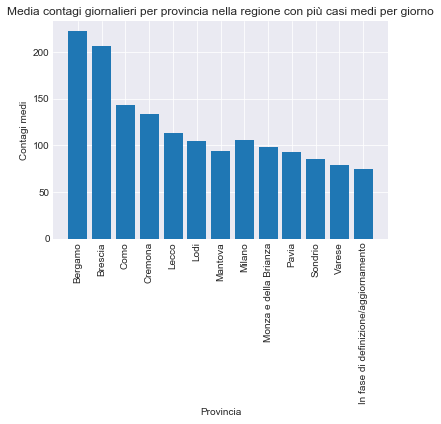

Classifica contagi medi giornalieri per provincia:
1 )  Bergamo :  222.0
2 )  Brescia :  205.95
3 )  Como :  143.39
4 )  Cremona :  133.39
5 )  Lecco :  112.94
6 )  Milano :  105.29
7 )  Lodi :  104.67
8 )  Monza e della Brianza :  97.99
9 )  Mantova :  94.33
10 )  Pavia :  92.85
11 )  Sondrio :  85.08
12 )  Varese :  79.14
13 )  In fase di definizione/aggiornamento :  74.74


In [285]:
prima_regione=comm[-1][0]#ottengo nome della prima regione per casi medi a giorno
#prima_regione
data_campione=prov.loc[0]['data']#ottengo una data per isolare i dati di un giorno solo in modo tale da a vere una sola riga per regione
#print(data_campione)

provv=prov.copy()

indexNames = provv[ provv['data'] != data_campione ].index
provv.drop(indexNames , inplace=True)#droppo tutte le righe che non hanno la data pari alla data campione

indexNames = provv[ provv['denominazione_regione'] != prima_regione ].index
provv.drop(indexNames , inplace=True)#droppo tutte le righe che non hanno la regione pari alla prima provincia

province=[x for x in provv.denominazione_provincia]#genero lista contenente i nomi delle province della prima regione

provv=prov.copy()

indexNames = provv[ provv['denominazione_regione'] != prima_regione ].index
provv.drop(indexNames , inplace=True)#droppo tutte le righe che non hanno la regione pari alla prima provincia


cronologia_contagi_provincia=crono_contagi_prov(provv, province)#lista di liste contenente la cronologia dei contagi provincia per regione seguendo l'ordine dei nomi presenti in nomi_regioni

#print(cronologia_contagi_provincia)

media_contagi_prov=media_contagi_giorno(cronologia_contagi_provincia)

combinato_p=combina(province, media_contagi_prov)#ottengo lista contenente la coppia regione-contagiati medi per giorno

combinato_p=sorted(combinato_p, key = itemgetter(1))#ordino la lista

plt.xticks(rotation='vertical')
x_pos = np.arange(len(province))
plt.bar(x_pos, media_contagi_prov, align='center')
plt.xticks(x_pos, province)
plt.ylabel('Contagi medi')
plt.xlabel('Provincia')
title="Media contagi giornalieri per provincia nella regione con più casi medi per giorno"
plt.title(title)
plt.show()

print('Classifica contagi medi giornalieri per provincia:')
classifica_contagi(combinato_p)

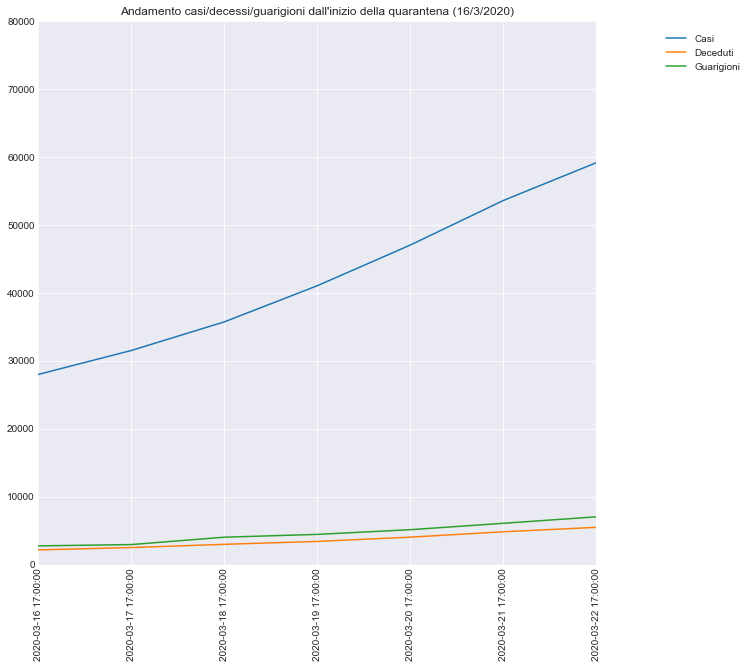

In [286]:
#analisi aumento quarantena con aumento infetti in ambito nazionale confrontati con decessi e guarigioni
#andamento contagi nazionali da lockdown(16-3)
plt.style.use('seaborn-darkgrid')
plt.subplots(figsize=(10,10))
plt.plot(naz["totale_casi"], label="Casi")
plt.plot(naz['deceduti'], label="Deceduti")
plt.plot(naz['dimessi_guariti'], label="Guarigioni")
limy=80000 
entx=21 #imposto valore iniziale asse x
limx=27 #imposto valore finale asse x
# entx e limx prenderanno i valori nell'interavallo
plt.xlim(entx, limx)
plt.ylim(0,limy)#imposto limite asse y
plt.xticks(rotation='vertical')
plt.margins(2)
plt.title("Andamento casi/decessi/guarigioni dall'inizio della quarantena (16/3/2020)")
plt.legend(bbox_to_anchor=(1.10,1),loc='upper left', borderaxespad=1.)
plt.show()

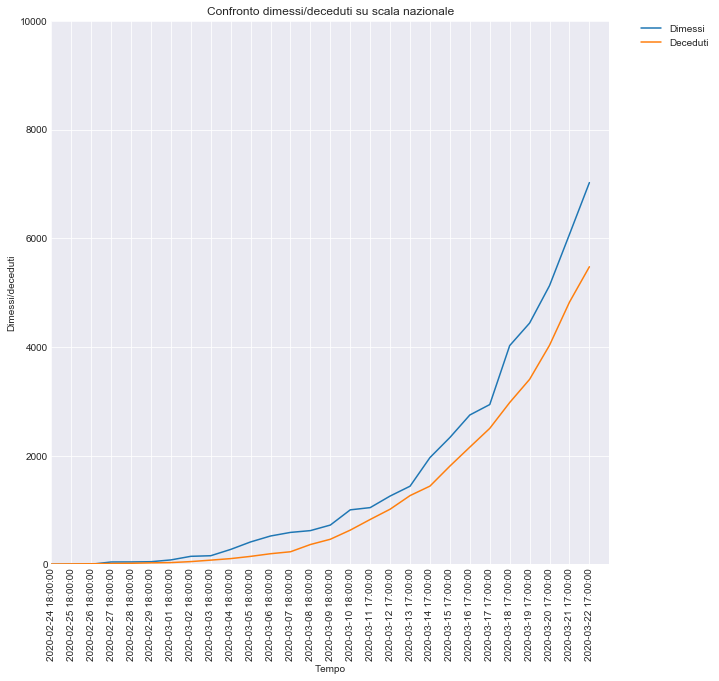

In [287]:
#confronto nazionale dimessi_guariti deceduti
plt.style.use('seaborn-darkgrid')
#plt.style.use('ggplot')
plt.subplots(figsize=(10,10))
plt.plot(naz['dimessi_guariti'], label='Dimessi')
plt.plot(naz['deceduti'], label='Deceduti')
limy=10000 #imposto limite asse y
plt.xlim(0,len(naz)) #imposto grandezze asse x
plt.ylim(0,limy) #imposto grandezze asse y
plt.xticks(rotation='vertical') #ruoto i label asse x
plt.margins(2)
plt.ylabel('Dimessi/deceduti')
plt.xlabel('Tempo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Confronto dimessi/deceduti su scala nazionale')
plt.show()

In [288]:
#media dimessi deceduti giornaliera nazionale
decessi=[x for x in naz.deceduti]
dimessi=[x for x in naz.dimessi_guariti]
m_decessi=media_decessi_giorno(decessi)
m_dimessi=media_decessi_giorno(dimessi)
print('Media giornaliera di morti: ',m_decessi)
print('Media giornaliera di dimissioni: ',m_dimessi)

Media giornaliera di morti:  195.57
Media giornaliera di dimissioni:  250.86


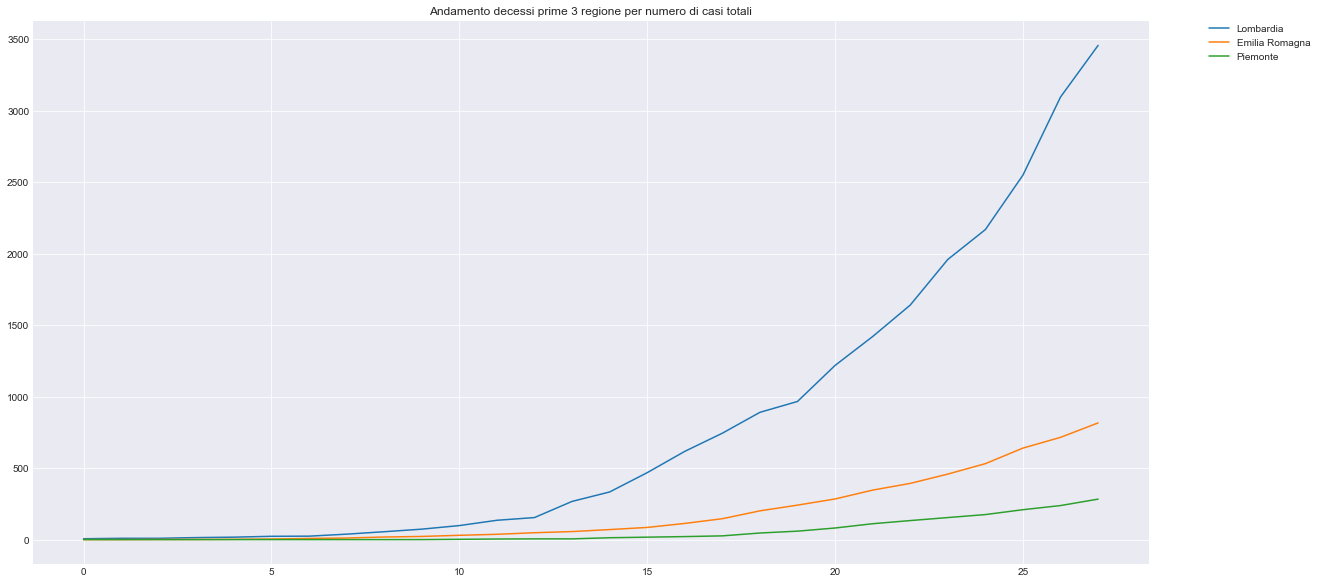

Confronto decessi/dimissioni per le prime 3 regioni più colpite


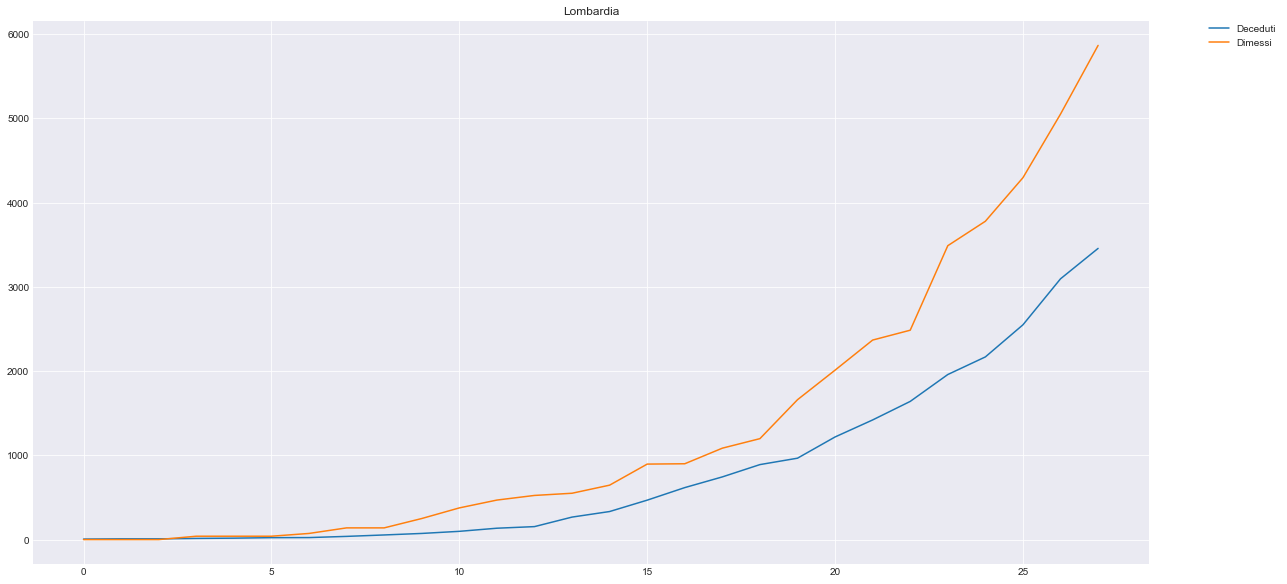

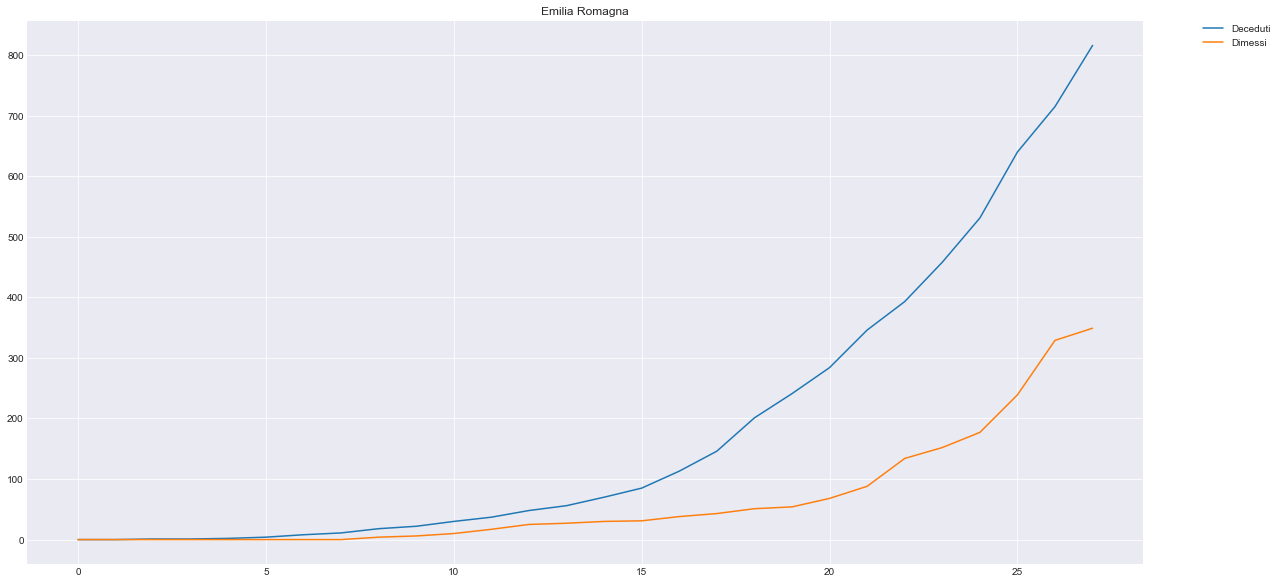

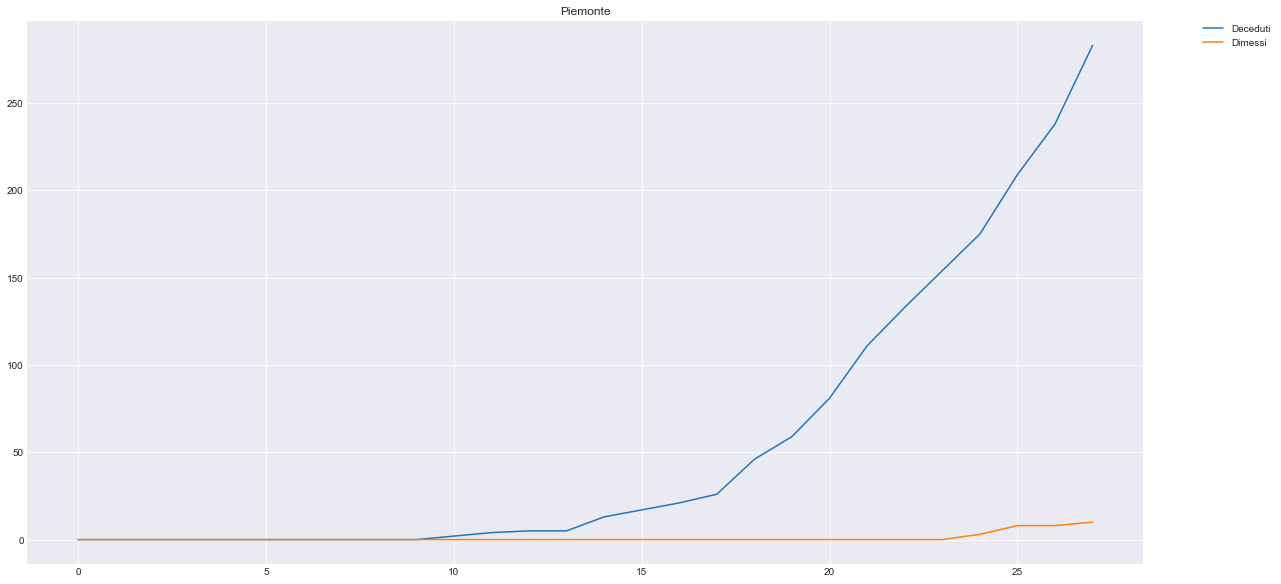

In [289]:
last_date=reg.loc[reg.shape[0]-1]['data']#ottengo data dell'ultima registrazione

regg=reg.copy()

indexNames = regg[ regg['data'] != last_date ].index
regg.drop(indexNames , inplace=True)#droppo tutte le righe che non hanno la data pari all'ultimo record

regioni=[x for x in regg.denominazione_regione]#genero liste contenenti i dati dell'ultima data
deceduti=[x for x in regg.deceduti]

combinato=combina(regioni, deceduti)#ottengo lista contenente la coppia regione-decessi
combinato=sorted(combinato, key = itemgetter(1))#ordino la lista

#print(combinato)

regg=reg.copy()

primi_tre=[combinato[-1][0], combinato[-2][0], combinato[-3][0]]#memorizzo le prime 3 regioni per numero di deceduti

cronologia_primi_tre_deceduti=crono_deceduti(regg, primi_tre)#array ocntenente la cronologia di crescita dei deceduti nelle 3 regioni

cronologia_primi_tre_dimessi=crono_dimessi(regg, primi_tre)#array contenente la cronologia di crescita dei guariti nelle prime 3 regioni colpite

plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_deceduti[0], label=primi_tre[0])
plt.plot(cronologia_primi_tre_deceduti[1], label=primi_tre[1])
plt.plot(cronologia_primi_tre_deceduti[2], label=primi_tre[2])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Andamento decessi prime 3 regione per numero di casi totali')
plt.show()

print('Confronto decessi/dimissioni per le prime 3 regioni più colpite')
plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_deceduti[0], label='Deceduti')
plt.plot(cronologia_primi_tre_dimessi[0], label='Dimessi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title(primi_tre[0])
plt.show()

plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_deceduti[1], label='Deceduti')
plt.plot(cronologia_primi_tre_dimessi[1], label='Dimessi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title(primi_tre[1])
plt.show()

plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_deceduti[2], label='Deceduti')
plt.plot(cronologia_primi_tre_dimessi[2], label='Dimessi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title(primi_tre[2])
plt.show()


In [290]:
globb=glob.copy() #copio il dataset globale
globb= globb.loc[glob.Country_Region=="Mainland China"] #estraggo le righe con stato uguale a Cina
globb.fillna(0, inplace=True) #sostituisco i NaN con 0
stato=[]
date=[x for x in globb['ObservationDate']]   #creo una lista con le date
province=[x for x in globb['Province_State']] #creo una lista con le province
contagiati=[x for x in globb['Confirmed']] #creo una lista con i contagiati
#creo una lista con solo scritto CHI in riferimento allo stato
for x in range(len(province)):
    stato.append("CHI")  
#unisco le liste in una lista di lista
province_contagiati_data=combina_4(date,stato, province, contagiati)
chi = pd.DataFrame.from_records(province_contagiati_data)#creo dataset con lista di lista
chi.columns = ["data","stato", "denominazione_regione", "totale_casi"]#allego le colonne
chi['totale_casi']=chi['totale_casi'].apply(np.int64) #trasformo i float in int
#chi

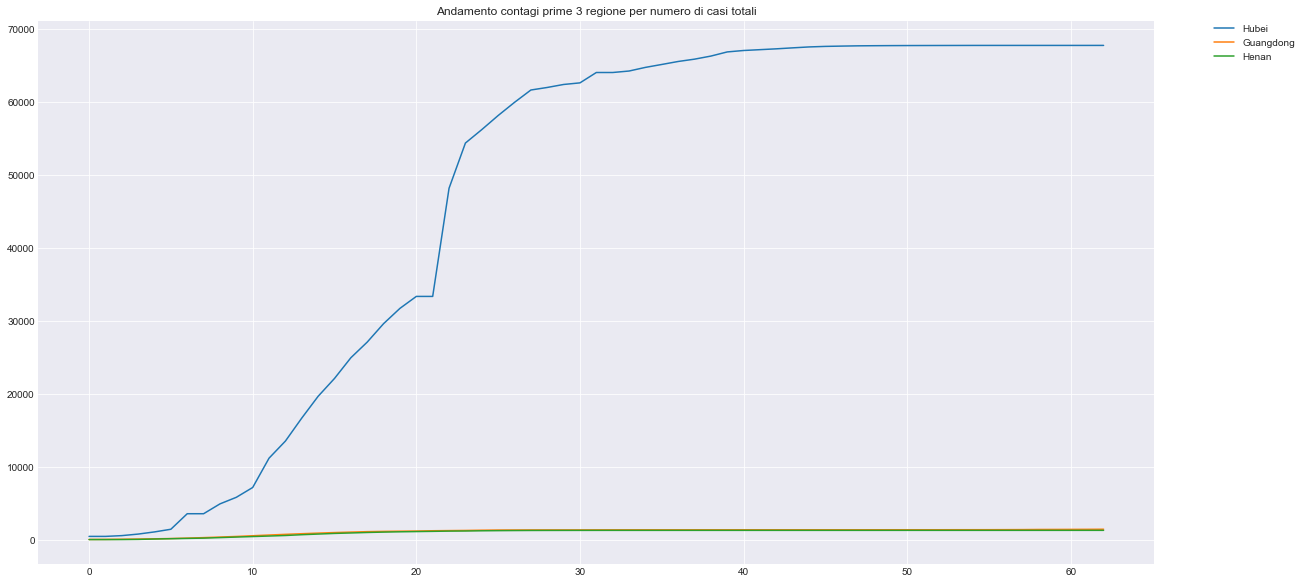

Confronto decessi/dimissioni per le prime 3 regioni più colpite


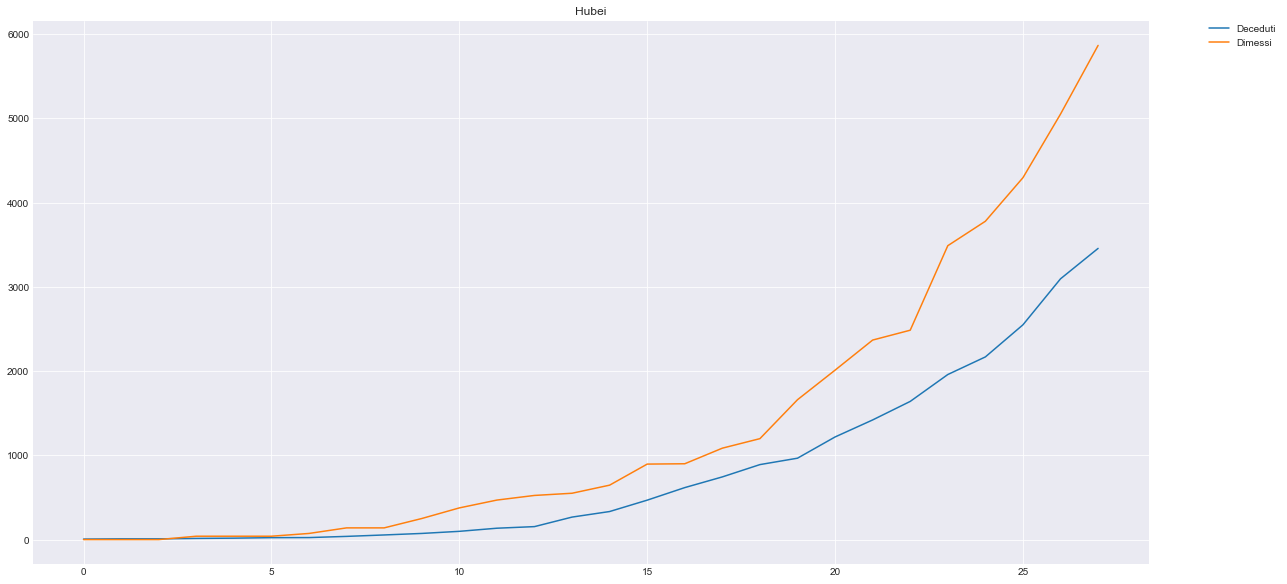

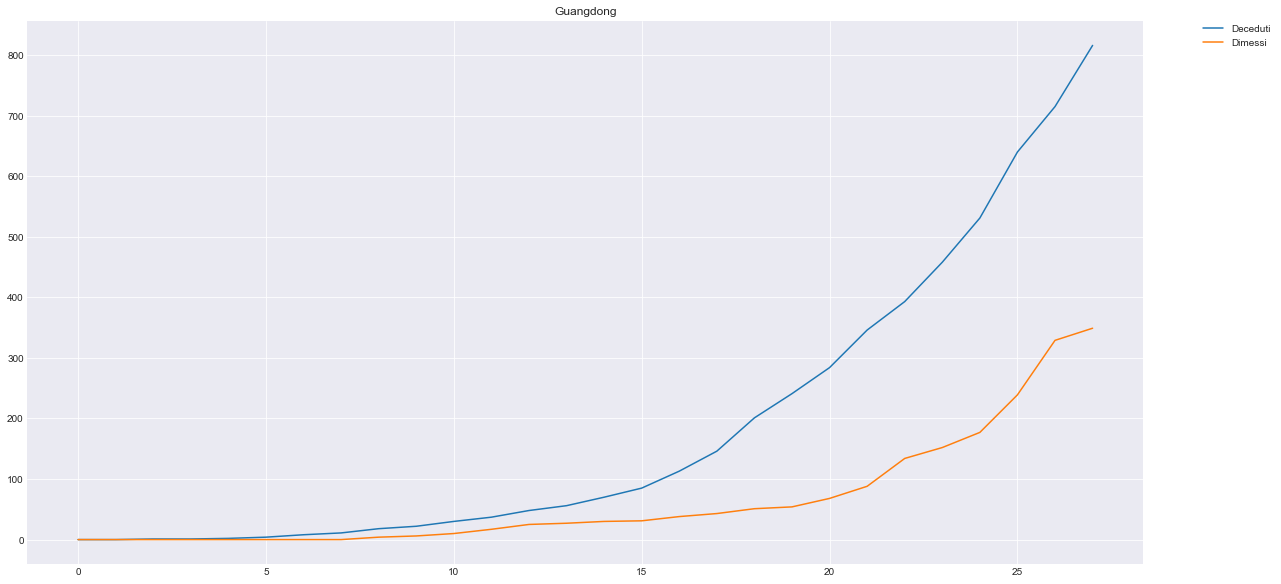

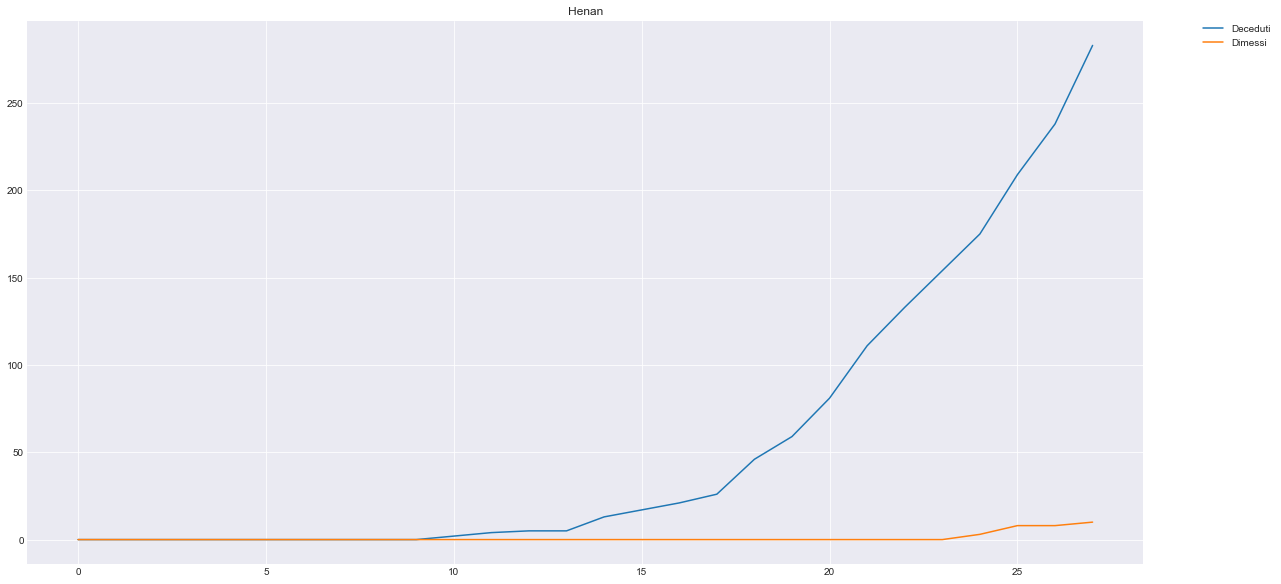

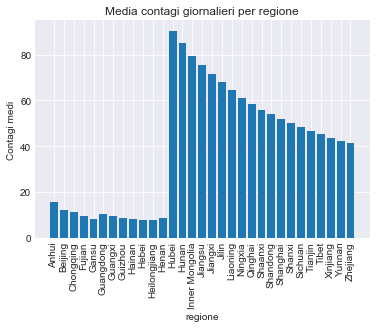

Classifica contagi medi giornalieri per regione:
1 )  Hubei :  90.47
2 )  Hunan :  85.18
3 )  Inner Mongolia :  79.61
4 )  Jiangsu :  75.28
5 )  Jiangxi :  71.74
6 )  Jilin :  67.85
7 )  Liaoning :  64.4
8 )  Ningxia :  61.25
9 )  Qinghai :  58.35
10 )  Shaanxi :  55.89
11 )  Shandong :  53.99
12 )  Shanghai :  52.02
13 )  Shanxi :  50.03
14 )  Sichuan :  48.44
15 )  Tianjin :  46.74
16 )  Tibet :  45.23
17 )  Xinjiang :  43.71
18 )  Yunnan :  42.34
19 )  Zhejiang :  41.61
20 )  Anhui :  15.71
21 )  Beijing :  12.29
22 )  Chongqing :  11.25
23 )  Guangdong :  10.55
24 )  Fujian :  9.7
25 )  Guangxi :  9.62
26 )  Henan :  8.75
27 )  Guizhou :  8.71
28 )  Gansu :  8.14
29 )  Hainan :  8.04
30 )  Heilongjiang :  7.72
31 )  Hebei :  7.72


In [291]:
#andamento contagio per le 3 regioni più colpite della cina
last_date=chi.loc[chi.shape[0]-1]['data']#ottengo data dell'ultima registrazione

chii=chi.copy()

indexNames = chii[ chii['data'] != last_date ].index
chii.drop(indexNames , inplace=True)#droppo tutte le righe che non hanno la data pari all'ultimo record

regione=[x for x in chii.denominazione_regione]#genero liste contenenti i dati dell'ultima data
casi=[x for x in chii.totale_casi]

combinato=combina(regione, casi)#ottengo lista contenente la coppia regione-casi
combinato=sorted(combinato, key = itemgetter(1))#ordino la lista

#print(combinato)

chii=chi.copy()

primi_tre=[combinato[-1][0], combinato[-2][0], combinato[-3][0]]#memorizzo le prime 3 regioni per numero di deceduti

cronologia_primi_tre_contagi=crono_contagi(chii, primi_tre)#array ocntenente la cronologia di crescita dei deceduti nelle 3 regioni

#print(cronologia_primi_tre_contagi)

plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_contagi[0], label=primi_tre[0])
plt.plot(cronologia_primi_tre_contagi[1], label=primi_tre[1])
plt.plot(cronologia_primi_tre_contagi[2], label=primi_tre[2])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Andamento contagi prime 3 regione per numero di casi totali')
plt.show()
###################################
print('Confronto decessi/dimissioni per le prime 3 regioni più colpite')
plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_deceduti[0], label='Deceduti')
plt.plot(cronologia_primi_tre_dimessi[0], label='Dimessi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title(primi_tre[0])
plt.show()

plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_deceduti[1], label='Deceduti')
plt.plot(cronologia_primi_tre_dimessi[1], label='Dimessi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title(primi_tre[1])
plt.show()

plt.subplots(figsize=(20,10))
plt.plot(cronologia_primi_tre_deceduti[2], label='Deceduti')
plt.plot(cronologia_primi_tre_dimessi[2], label='Dimessi')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title(primi_tre[2])
plt.show()


data_campione=chi.loc[0]['data']#ottengo una data per isolare i dati di un giorno solo in modo tale da a vere una sola riga per regione

chii=chi.copy()

indexNames = chii[ chii['data'] != data_campione ].index
chii.drop(indexNames , inplace=True)#droppo tutte le righe che non hanno la data pari alla data campione

nomi_regioni=[x for x in chii.denominazione_regione]#genero lista contenente i nomi delle varie regioni

chii=chi.copy()

crono_contagi_regioni=crono_contagi(chii, nomi_regioni)#lista di liste contenente la cronologia dei contagi regione per regione seguendo l'ordine dei nomi presenti in nomi_regioni

media_contagi_reg=media_contagi_giorno(crono_contagi_regioni)

comm=combina(nomi_regioni, media_contagi_reg)#ottengo lista contenente la coppia regione-contagiati medi per giorno
comm=sorted(comm, key = itemgetter(1))#ordino la lista

plt.xticks(rotation='vertical')
x_pos = np.arange(len(nomi_regioni))
plt.bar(x_pos, media_contagi_reg, align='center')
plt.xticks(x_pos, nomi_regioni)
plt.ylabel('Contagi medi')
plt.xlabel('regione')
plt.title('Media contagi giornalieri per regione')

plt.show()
print('Classifica contagi medi giornalieri per regione:')
classifica_contagi(comm)


In [292]:
chitaa=chita.copy()
cina=chitaa.loc[0]['Stato']
indexNames=chitaa[chitaa['Stato']!=cina].index
chitaa.drop(indexNames, inplace=True)#droppo tutte le righe che non sono la cina

cinesi=[x for x in chitaa.Regione]#nomi regioni cinesi
dens_cina=[x for x in chitaa.Densita]#densità regioni cinesi
pil_cina=[x for x in chitaa.PIL]#pil regioni cinesi

chitaa=chita.copy()

italia=chitaa.loc[chitaa.shape[0]-1]['Stato']
indexNames=chitaa[chitaa['Stato']!=italia].index
chitaa.drop(indexNames, inplace=True)#droppo tutte le righe che non sono la cina

italiani=[x for x in chitaa.Regione]#nomi regioni cinesi
dens_italia=[x for x in chitaa.Densita]#densità regioni cinesi
pil_italia=[x for x in chitaa.PIL]#pil regioni cinesi

comb_cina=combina_3(cinesi,dens_cina,pil_cina)#ottengo lista contenente il trio regione, densità, pil
comb_italia=combina_3(italiani, dens_italia, pil_italia)

In [293]:
#confronto densità
comb_cina=sorted(comb_cina, key = itemgetter(1))#ordino la lista per il secondo elemento
comb_italia=sorted(comb_italia, key = itemgetter(1))#ordino la lista per il secondo elemento

In [294]:
#estraggo regione più densa
dens_cina=[comb_cina[-1][0]]#metto in una lista così non devo creare un metodo apposta per questa estrazione di cronologia
dens_italia=[comb_italia[-1][0]]

In [295]:
crono_cont_ita=crono_contagi(regg, dens_italia)#array ocntenente la cronologia di crescita dei deceduti nelle 3 regioni
chii=chi.copy()
crono_cont_cina=crono_contagi(chii, dens_cina)#array ocntenente la cronologia di crescita dei deceduti nelle 3 regioni

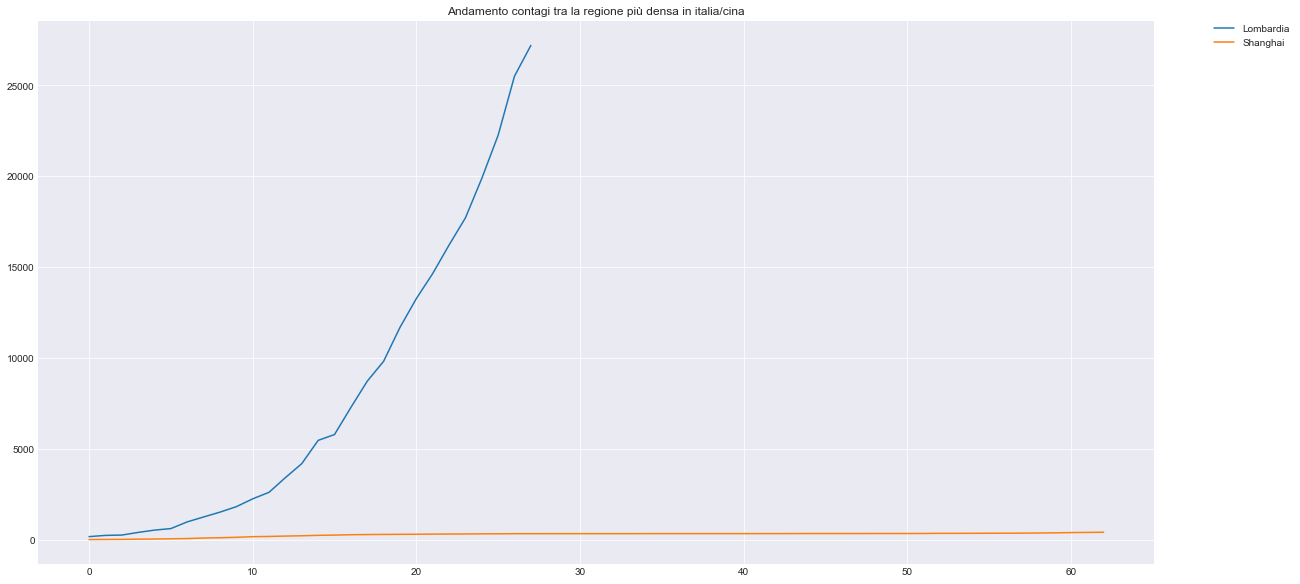

I dati cinesi partono da molto prima dei rilevamenti in italia


In [296]:
plt.subplots(figsize=(20,10))
plt.plot(crono_cont_ita[0], label=dens_italia[0])
plt.plot(crono_cont_cina[0], label=dens_cina[0])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Andamento contagi tra la regione più densa in italia/cina')
plt.show()
print("I dati cinesi partono da molto prima dei rilevamenti in italia")

In [297]:
#confronto pil
comb_cina=sorted(comb_cina, key = itemgetter(2))#ordino la lista per il secondo elemento
comb_italia=sorted(comb_italia, key = itemgetter(2))#ordino la lista per il secondo elemento

In [298]:
#estraggo regione con pil più alto
pil_cina=[comb_cina[-1][0]]#metto in una lista così non devo creare un metodo apposta per questa estrazione di cronologia
pil_italia=[comb_italia[-1][0]]

In [299]:
crono_cont_ita=crono_contagi(regg, pil_italia)#array ocntenente la cronologia di crescita dei deceduti nelle 3 regioni
chii=chi.copy()
crono_cont_cina=crono_contagi(chii, pil_cina)#array ocntenente la cronologia di crescita dei deceduti nelle 3 regioni

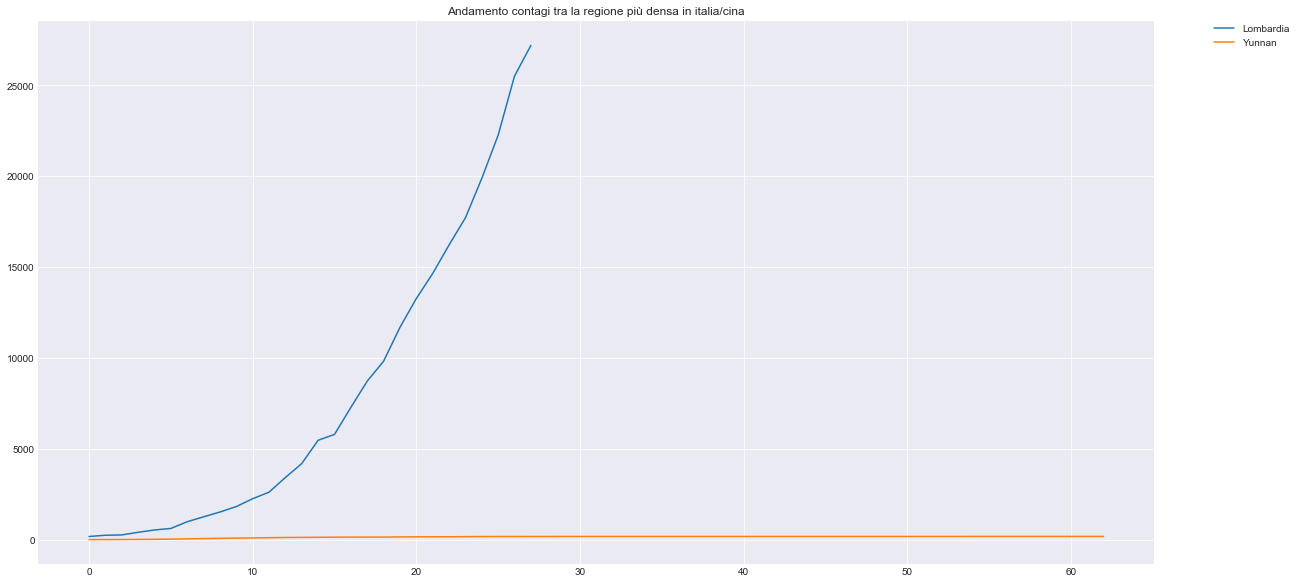

I dati cinesi partono da molto prima dei rilevamenti in italia


In [300]:
plt.subplots(figsize=(20,10))
plt.plot(crono_cont_ita[0], label=pil_italia[0])
plt.plot(crono_cont_cina[0], label=pil_cina[0])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Andamento contagi tra la regione più densa in italia/cina')
plt.show()
print("I dati cinesi partono da molto prima dei rilevamenti in italia")